# HW2

#### NAME: Yuhao Wang
#### UNI: yw3204

### Problem 1

1.
<img src="Image-1.jpg">

2.

(a) There are 10304 PCA's in total.

(b) According to the sigular value decomposition, we have $X = UDV^T$ or $XV = UD$. Each column in $UD$ is interpreted as the score variable. Assuming the corresponding score of $x$ is $s$, which is a row vector of length 48 here, then we can reconstruct the $x$ by $\hat x = s * V^T$.

### Problem 2

In [2]:
from pandas_datareader import data
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.decomposition import PCA

In [3]:
# 1. crawl tickers for each stock 
raw_html = open('wiki_DJ.html').read()
html = BeautifulSoup(raw_html, 'html.parser')
symb = html.find_all("a", class_="external text")
tickers = [i.text for i in symb[1:31]]

In [4]:
# load data
df = pd.DataFrame()

start_date = '2018-01-01'
end_date = '2019-01-01'

for i in range(30):
    tmp = data.DataReader(tickers[i], 'yahoo', start_date, end_date)
    tmp = tmp["Close"]
    df[tickers[i]] = tmp

In [5]:
# 2. performing pca 
df_0 = df - df.mean(axis = 0) # centering matrix

pca = PCA(n_components=30)
pca.fit(df_0)

score = pd.DataFrame()
score["1st"] = np.dot(df_0, pca.components_[0])
score["2nd"] = np.dot(df_0, pca.components_[1])

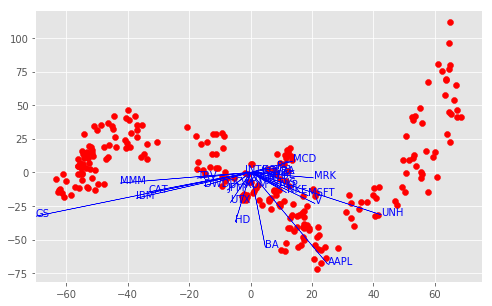

In [16]:
# biplot
plt.figure(figsize=(8, 5))
plt.scatter(score["1st"], score["2nd"], color = "r")

for i in range(30):
    plt.arrow(0, 0, pca.components_[0, i]*120, pca.components_[1, i]*120, color = 'b')
    
for i in range(30):
    plt.text(pca.components_[0, i]*120, pca.components_[1, i]*120, tickers[i], color = 'b')

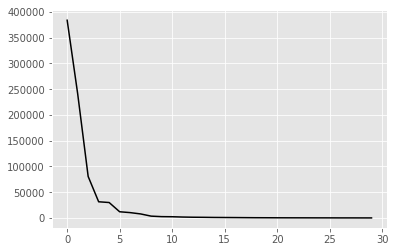

In [17]:
# scree plot
plt.plot(pca.singular_values_ ** 2, color = "black")
plt.show()

The biplot is hard to read and also kind of unstructured. For example, using the cosine similarity, we may find Goldman Sachs and IBM being close to each other. For the scree plot, there are about 3 to 4 important components.

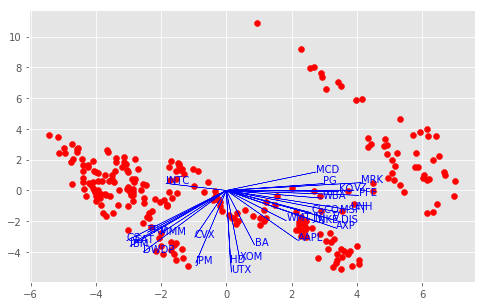

In [21]:
# 3. pca after scaling
df1 = df_0 / df_0.std(axis = 0)

pca1 = PCA(n_components=30)
pca1.fit(df1)

score1 = pd.DataFrame()
score1["1st"] = np.dot(df1, pca1.components_[0])
score1["2nd"] = np.dot(df1, pca1.components_[1])

plt.figure(figsize = (8, 5))
plt.scatter(score1["1st"], score1["2nd"], color = "r")

for i in range(30):
    plt.arrow(0, 0, pca1.components_[0, i]*15, pca1.components_[1, i]*15, color = 'b')
    
for i in range(30):
    plt.text(pca1.components_[0, i]*15, pca1.components_[1, i]*15, tickers[i], color = 'b')

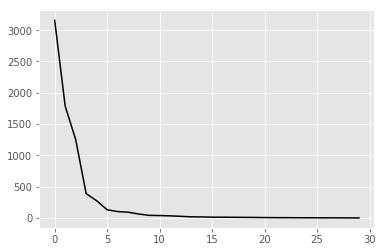

In [19]:
plt.plot(pca1.singular_values_ ** 2, color = "black")
plt.show()

This time, the biplot is much clearer. And we may notice some slight clustering, like UNH and PFE, both of which are in the health industry. As for the scree plot, we may choose 4 to 5 important component this time. 

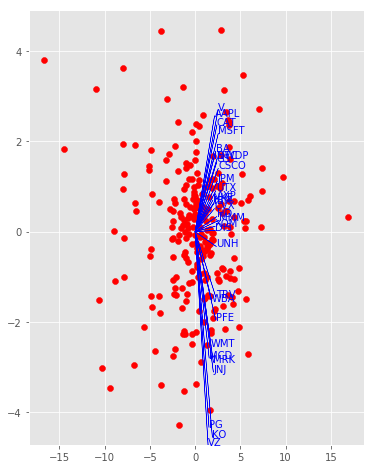

In [31]:
# 4. pca on scaling return data, 
df_r = np.log(df).diff()[1:]
df_r = df_r - df_r.mean(axis = 0)
df_r = df_r / df_r.std(axis = 0)

pca2 = PCA(n_components=30)
pca2.fit(df_r)

score2 = pd.DataFrame()
score2["1st"] = np.dot(df_r, pca2.components_[0])
score2["2nd"] = np.dot(df_r, pca2.components_[1])

plt.figure(figsize = (6, 8))
plt.scatter(score2["1st"], score2["2nd"], color = "r")

for i in range(30):
    plt.arrow(0, 0, pca2.components_[0, i]*12, pca2.components_[1, i]*12, color = 'b')
    
for i in range(30):
    plt.text(pca2.components_[0, i]*12, pca2.components_[1, i]*12, tickers[i], color = 'b')

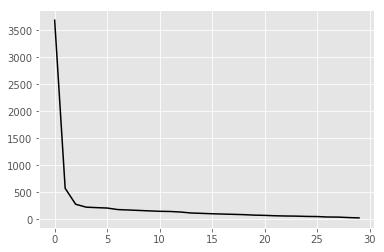

In [23]:
plt.plot(pca2.singular_values_ ** 2, color = "black")
plt.show()

The biplot is totally different from the two above and we may also notice slight clustering, like APPL and MSFT on the upper part of the picture. As for the scree plot, we may choose 2 to 3 important components this time.

### Problem 3

Let $T$ be the centered inner product matrix with elements $T_{ij} = <z_i-\bar z, z_j-\bar z>$, then

$tr[(S-T)^2]$

$= \Sigma_{i=1}^n (S-T)^2_{ii}$

$= \Sigma_{i=1}^n <(S-T)_{i\bullet}, (S-T)_{\bullet i}>$

$= \Sigma_{i=1}^n \Sigma_{j=1}^n (S-T)_{ij} * (S-T)_{ji}$

$= \Sigma_{i=1}^n \Sigma_{j=1}^n (S_{ij}-T_{ij}) * (S_{ji}-T_{ji})$

$= \Sigma_{i=1}^n \Sigma_{j=1}^n (S_{ij}-T_{ij})^2$

Assume that the eigen decomposition of $S$ and $T$ are $UD^2U^T$ and $\tilde U \tilde D^2 \tilde U^T$, where $\tilde D$ is a diagonal matrix, with diagonal elements $\tilde d_1 \ge \tilde d_2 \ge \dots \ge \tilde d_k$. 

$S_C(z_1, z_2, \dots, z_n)$

$= tr[(UD^2U^T - \tilde U \tilde D^2 \tilde U^T)^2]$

$= tr[UD^2U^T * UD^2U^T + \tilde U \tilde D^2 \tilde U^T * \tilde U \tilde D^2 \tilde U^T - UD^2U^T * \tilde U \tilde D^2 \tilde U^T - \tilde U \tilde D^2 \tilde U^T * UD^2U^T]$

$= tr[UD^2*D^2U^T + \tilde U \tilde D^2 * \tilde D^2 \tilde U^T - UD^2U^T * \tilde U \tilde D^2 \tilde U^T - \tilde U \tilde D^2 \tilde U^T * UD^2U^T]$

$= tr[UD^4U^T] + tr[\tilde U \tilde D^4 \tilde U^T] - tr[UD^2U^T * \tilde U \tilde D^2 \tilde U^T] - tr[\tilde U \tilde D^2 \tilde U^T * UD^2U^T]$

$= tr[D^4] + tr[\tilde D^4] - 2 * tr[D^2U^T \tilde U \tilde D^2 \tilde U^T U]$

$= tr[D^4 + \tilde D^4 - 2 * D^2U^T \tilde U \tilde D^2 \tilde U^T U]$

Then the problem boils down to minimize $tr[UD^4U^T + \tilde U \tilde D^4 \tilde U^T - 2 * D^2U^T \tilde U \tilde D^2 \tilde U^T U]$.

Let $A = U^T\tilde U$. Then, 

$S_C = tr[D^4] + tr[\tilde D^4] - 2 * tr[D^2U^T \tilde U \tilde D^2 \tilde U^T U]= tr[D^4] + tr[\tilde D^4] - 2 * tr[D^2 A \tilde D^2 A^T]$


$\frac{\partial S_C}{\partial \tilde d^2_j} = \frac{\partial}{\partial \tilde d^2_j}tr[\tilde D^4] - 2*\frac{\partial}{\partial \tilde d^2_j}tr[D^2 A \tilde D^2 A^T]$

$= \frac{\partial}{\partial \tilde d^2_j}\tilde d^4_j - 2*\frac{\partial}{\partial \tilde d^2_j}tr[A^TD^2A \tilde D^2]$

$= 2\tilde d^2_j - 2*(A^TD^2A)_{jj}$

$= 2\tilde d^2_j - 2*<(d_1^2a_{1j}, \dots, d_n^2a_{nj}), (a_{1j}, \dots, a_{nj})>$

$= 2\tilde d^2_j - 2*\Sigma_{i=1}^n d_i^2a_{ij}^2$

Thus, 

$\frac{\partial S_C}{\partial \tilde d^2_j} = 2\tilde d^2_j - 2*\Sigma_{i=1}^n d_i^2a_{ij}^2$, for $j = 1, \dots, n$


By setting the partial derivative to be zero, we have $\tilde d^2_j = \Sigma_{i=1}^n d_i^2a_{ij}^2$.

Then, 

$S_C = tr[D^4] + tr[\tilde D^4] - 2 * tr[D^2 A \tilde D^2 A^T]$

$= tr[D^4] + \Sigma_{i=1}^k\tilde d_i^4 - 2 * \Sigma_{i=1}^k(D^2 A \tilde D^2 A^T)_{ii}$

$= tr[D^4] + \Sigma_{i=1}^k\tilde d_i^4 - 2*\Sigma_{i=1}^k <(d_i^2a_{i1}, \dots, d_i^2a_{in}), (\tilde d_i^2a_{i1}, \dots, \tilde d_i^2a_{in})>$

$= tr[D^4] + \Sigma_{i=1}^k\tilde d_i^4 - 2*\Sigma_{i=1}^k \Sigma_{j=1}^n d_i^2\tilde d_i^2a_{ij}^2$

$= tr[D^4] + \Sigma_{i=1}^k\tilde d_i^4 - 2*\Sigma_{i=1}^k \tilde d_i^2 \Sigma_{j=1}^n d_i^2a_{ij}^2$

$= tr[D^4] + \Sigma_{i=1}^k\tilde d_i^4 - 2*\Sigma_{i=1}^k \tilde d_i^2 \tilde d_i^2$

$= tr[D^4] - \Sigma_{i=1}^k\tilde d_i^4$

$= tr[D^4] - \Sigma_{i=1}^k(\Sigma_{i=1}^n d_i^2a_{ij}^2)^2$

Then, it suffices to maximize $\Sigma_{i=1}^k(\Sigma_{i=1}^n d_i^2a_{ij}^2)^2$.

Note that the $j^{th}$ column of $A$ is $(a_{1j}, \dots, a_{nj}) = U^T\tilde U_{\bullet j} = U^T\tilde u_j$.

Then, 

$\Sigma_{i=1}^k(\Sigma_{i=1}^n d_i^2a_{ij}^2)^2$

$= \Sigma_{i=1}^k (<(d_1^2a_{1j}, \dots, d_n^2a_{nj}), (a_{1j}, \dots, a_{nj})>)^2$

$= \Sigma_{i=1}^k  (\tilde u_j^T U*D^2*U^T\tilde u_j)^2$

Maximising $\Sigma_{i=1}^k  (\tilde u_j^T U*D^2*U^T\tilde u_j)^2$ is equivalent to finding the first k principal components of $X^T$.

Therefore, $\tilde U = U$ restricted on the first k column $= U_k$ and $\tilde D = D$ restricted on the first k rows and columns = $D_k$.

Thus, we proved $Z = \tilde U \tilde D = U_kD_k$ is one of the valid solution.